In [23]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns

In [24]:
class JobApplication:
    def __init__(self,date,title,company,type,experience,salary,interview_difficulty):
        self.date = date
        self.title = title
        self.company = company
        self.type = type
        self.experience = experience
        self.salary = salary
        self.interview_difficulty = interview_difficulty
        self.unique_id = id(self)
    def __str__(self):
        return f"{self.unique_id},{self.date},{self.title},{self.company},{self.type},{self.experience},{self.salary},{self.interview_difficulty}"

In [25]:
class StemJobApplication(JobApplication):
    def __init__(self,date,title,company,experience,salary,interview_difficulty):
        super().__init__(date,title,company,"Stem",experience,salary,interview_difficulty)


In [26]:
class NonStemJobApplication(JobApplication):
    def __init__(self,date,title,company,experience,salary,interview_difficulty):
        super().__init__(date,title,company,"non-Stem",experience,salary,interview_difficulty)


In [27]:
class Apple(StemJobApplication):
    def __init__(self,date,title,experience,salary,interview_difficulty):
        super().__init__(date,title,"Apple",experience,salary,interview_difficulty)

class Siemens(NonStemJobApplication):
    def __init__(self,date,title,experience,salary,interview_difficulty):
        super().__init__(date,title,"Siemens",experience,salary,interview_difficulty)

class Boeing(NonStemJobApplication):
    def __init__(self,date,title,experience,salary,interview_difficulty):
        super().__init__(date,title,"Boeing",experience,salary,interview_difficulty)


In [28]:
with open('JobApplicationpkl638200306.dat', 'rb') as fb:
    try:
        while (True):
            objects = pickle.load(fb)
            print(len(objects))
    except EOFError:
        pass

10000


In [29]:
with open('data.csv', 'w') as f:
    f.write("unique_id,date,title,company,type,experience,salary,interview_difficulty\n")
    for obj in objects:
        f.write(str(obj)+'\n')

Data Viz

In [30]:
data = pd.read_csv("data.csv")

In [31]:
#Check for Null values
print('Date null count',data['date'].isnull().sum())
print('Title null count',data['title'].isnull().sum())
print('Experience null count',data['experience'].isnull().sum())
print('Salary null count',data['salary'].isnull().sum())
print('Interview difficulty null count',data['interview_difficulty'].isnull().sum())
print(data.info())

Date null count 449
Title null count 0
Experience null count 420
Salary null count 392
Interview difficulty null count 391
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             10000 non-null  int64  
 1   date                  9551 non-null   object 
 2   title                 10000 non-null  object 
 3   company               10000 non-null  object 
 4   type                  10000 non-null  object 
 5   experience            9580 non-null   float64
 6   salary                9608 non-null   float64
 7   interview_difficulty  9609 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB
None


Filling date with mode value of date found

In [32]:
data.fillna({'date':data['date'].mode()[0]},inplace=True)

uniqueCompanies=data['company'].unique()
uniqueExperience=data['experience'].unique()

for company in uniqueCompanies:
    data.fillna({'experience':data[data['company']==company]['experience'].median()},inplace=True)
    for experience in uniqueExperience:
        if(np.isnan(experience)):
            continue
        data.fillna({'salary':data[(data['experience']==experience) & (data['company']==company)]['salary'].mean()},inplace=True)
        data.fillna({'interview_difficulty':data[(data['experience']==experience) & (data['company']==company)]['interview_difficulty'].mean()},inplace=True)

In [33]:
#Check for Null values after filling data
print('Date null count',data['date'].isnull().sum())
print('Title null count',data['title'].isnull().sum())
print('Experience null count',data['experience'].isnull().sum())
print('Salary null count',data['salary'].isnull().sum())
print('Interview difficulty null count',data['interview_difficulty'].isnull().sum())

Date null count 0
Title null count 0
Experience null count 0
Salary null count 0
Interview difficulty null count 0


In [34]:
uniqueExperience=data['experience'].unique()
uniqueExperience.sort()

In [35]:
data

,unique_id,date,title,company,type,experience,salary,interview_difficulty
0,132932533899120,2022-04-07,platform engineer,Apple,Tech,2.0,64704.000000,91.26
1,132932533907520,2022-06-24,trainee,Boeing,non-Tech,2.0,65725.000000,86.21
2,132932533898688,2022-08-21,database engineer,Apple,Tech,1.0,67064.000000,90.86
3,132932533910592,2022-07-08,database engineer,Apple,Tech,3.0,91818.000000,88.01
4,132932533895616,2022-12-23,platform engineer,Apple,Tech,2.0,70413.942401,80.53
...,...,...,...,...,...,...,...,...
9995,132932514141552,2022-07-17,database engineer,Apple,Tech,3.0,72924.000000,99.78
9996,132932514141600,2022-09-29,database engineer,Apple,Tech,2.0,60539.000000,98.72
9997,132932514141648,2022-06-20,eletrician,Siemens,non-Tech,3.0,74696.000000,95.53
9998,132932514141696,2022-08-24,eletrician,Siemens,non-Tech,1.0,69550.000000,88.47


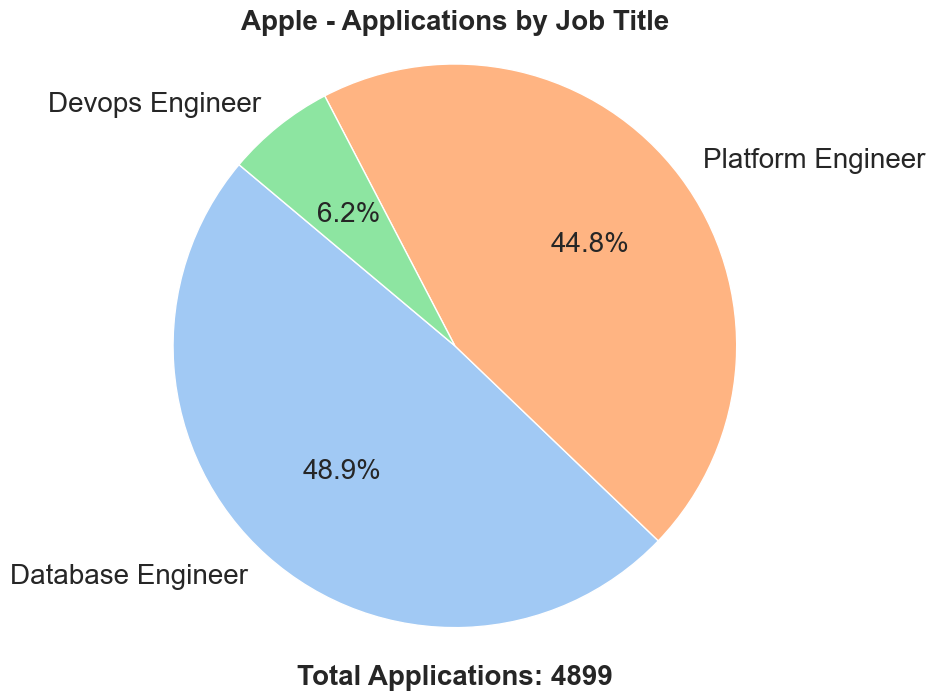

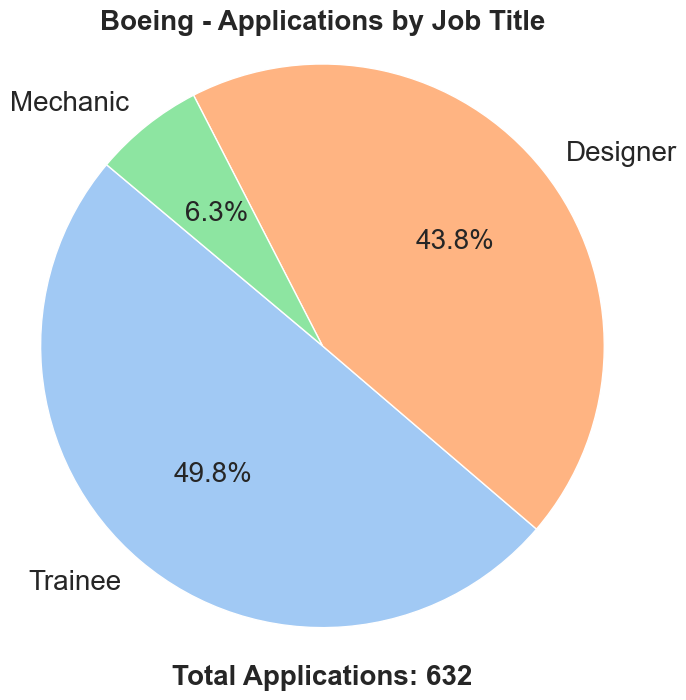

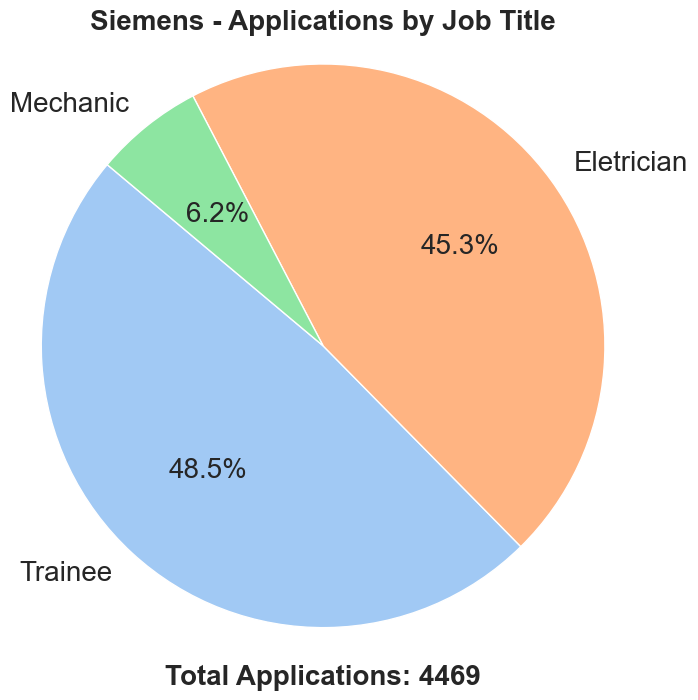

In [36]:
# Set a custom color palette
sns.set_palette("pastel")

unique_companies = data['company'].unique()

for company in unique_companies:
    # Create a new figure for each company with a larger size
    plt.figure(figsize=(8, 8))

    # Filter data for the current company
    company_data = data[data['company'] == company]

    # Calculate the count of applications for each job title
    title_counts = company_data['title'].value_counts()

    # Capitalize the first letter of each word in the job title labels
    job_titles = [title.title() for title in title_counts.index]

    # Plot pie chart with percentages displayed
    plt.pie(title_counts, labels=job_titles, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 20})

    # Set title for the pie chart with first letter in caps
    plt.title(f'{company.title()} - Applications by Job Title',fontsize=20, weight='bold')

    # Add total number of applications as a text annotation
    total_applications = len(company_data)
    plt.text(0, -1.2, f'Total Applications: {total_applications}', ha='center', fontsize=20, weight='bold')

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')

    # Show the pie chart
    plt.show()



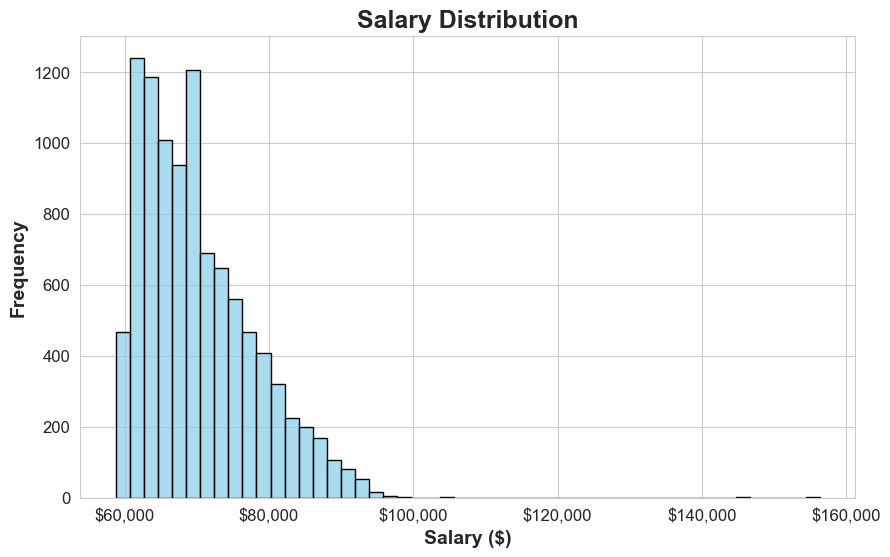

In [37]:
# Set seaborn style
sns.set_style("whitegrid")

# Create the histogram plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(data['salary'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Add title and labels with adjusted font sizes and styles
plt.title('Salary Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Salary ($)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Format salary labels with dollar sign and accounting format
formatter = ticker.StrMethodFormatter('${x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

# Set font size for tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(True)

# Show plot
plt.show()




In [38]:
dataForBarGraph = []
for company in uniqueCompanies:
    dataForBarGraph.append(data[data['company']==company]['salary'].max())


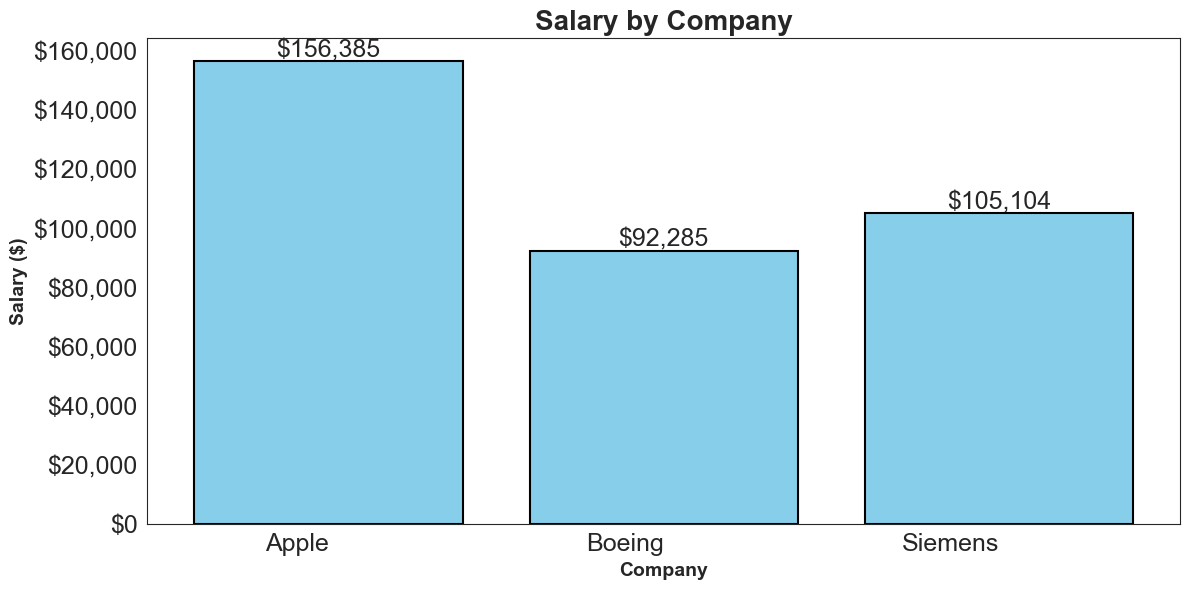

In [39]:
# Set seaborn style
sns.set_style("white")

# Create the bar chart with customizations
plt.figure(figsize=(12, 6))
bars = plt.bar(uniqueCompanies, dataForBarGraph, color='skyblue', edgecolor='black', linewidth=1.5)

# Add data labels on top of each bar with accounting format
formatter = ticker.StrMethodFormatter('${x:,.0f}')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, formatter(height), ha='center', va='bottom', fontsize=18)

# Add title and labels with adjusted font sizes and styles
plt.title('Salary by Company', fontsize=20, fontweight='bold')
plt.xlabel('Company', fontsize=14, fontweight='bold')
plt.ylabel('Salary ($)', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, ha='right', fontsize=18)

# Set y-axis tick parameters with accounting format
plt.yticks(fontsize=18)
plt.gca().yaxis.set_major_formatter(formatter)



# Show plot
plt.tight_layout()
plt.show()



In [40]:
uniqueExperience

array([1., 2., 3., 4., 5.])

In [41]:
dataForLinePlot = {}
for company in uniqueCompanies:
    dataForCompany = []
    for experience in uniqueExperience:
        dataForCompany.append(data[(data['company']==company) & (data['experience']==experience)]['salary'].mean())
    dataForLinePlot[company]=(dataForCompany)


In [42]:
dataForLinePlot

{'Apple': [70236.08830463479,
  70413.94240055831,
  70196.73140275652,
  70336.78801863061,
  70581.58333333333],
 'Boeing': [69836.05836192651,
  70630.61248824967,
  68619.84922554973,
  70352.76474668528,
  69185.4],
 'Siemens': [70032.59713539977,
  70150.5221711582,
  70051.85533482858,
  69441.92486245808,
  65257.142857142855]}

In [43]:
dataframeForLinePlot = pd.DataFrame(dataForLinePlot,index=uniqueExperience)

<Figure size 1000x600 with 0 Axes>

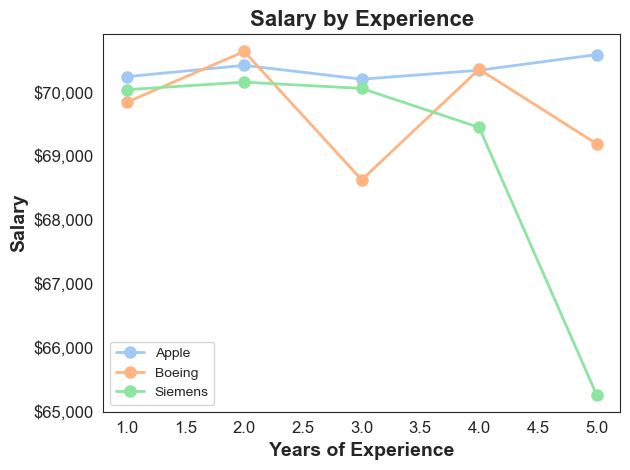

In [44]:
# Set seaborn style
sns.set_style("white")

# Create the line plot with customizations
plt.figure(figsize=(10, 6))

# Plot the line plot
dataframeForLinePlot.plot.line(marker='o', markersize=8, linestyle='-', linewidth=2)

# Add title and labels with adjusted font sizes and styles
plt.title('Salary by Experience', fontsize=16, fontweight='bold')
plt.xlabel('Years of Experience', fontsize=14, fontweight='bold')
plt.ylabel('Salary', fontsize=14, fontweight='bold')

# Set x-axis and y-axis tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(formatter)


# Show plot
plt.tight_layout()
plt.show()


In [45]:
dataForBoxPlot = []
for company in uniqueCompanies:
    dataForBoxPlot.append(data[data['company']==company]['interview_difficulty'])

In [121]:
dataframeForLinePlot

,Apple,Boeing,Siemens
1.0,70228.772661,69812.630631,70015.679273
2.0,70383.536143,70424.542735,70202.695659
3.0,70187.935457,68560.703297,70038.940127
4.0,70333.024390,70350.655172,69407.560606
5.0,70581.583333,69185.400000,65257.142857
NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Interview Difficulty by Company')

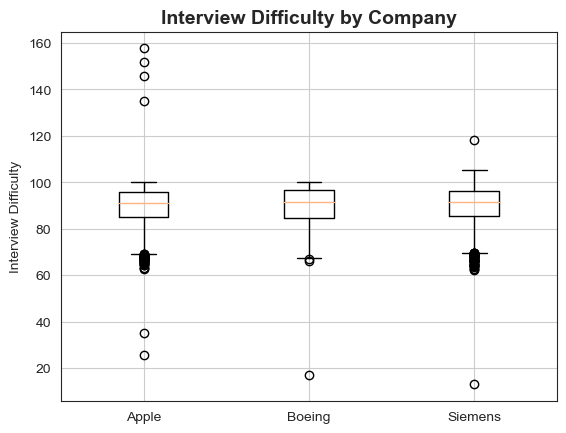

In [46]:
plt.boxplot(dataForBoxPlot,labels=uniqueCompanies)
plt.ylabel('Interview Difficulty')
plt.grid(True)
plt.title('Interview Difficulty by Company', fontsize=14, fontweight='bold')

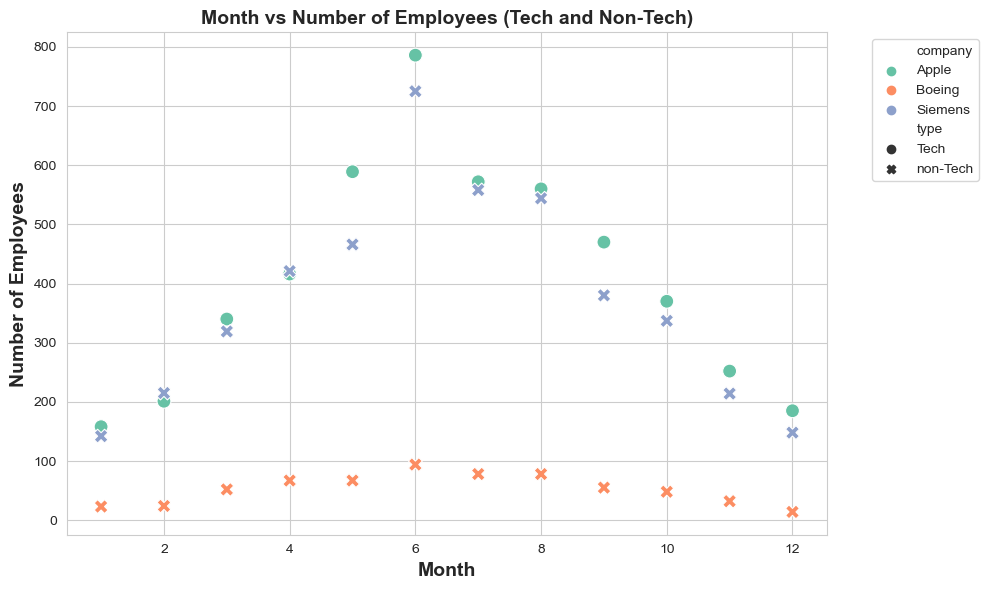

In [47]:
# Set seaborn style
sns.set_style("whitegrid")

# Convert 'date' column to datetime if it's not already in datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract month from the 'date' column
data['month'] = data['date'].dt.month

# Group by month, company, and type, and count the number of employees
monthly_employee_count = data.groupby(['month', 'company', 'type']).size().reset_index(name='employee_count')

# Scatter plot: Date vs No. of Employees (Combined for Tech and Non-Tech)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_employee_count, x='month', y='employee_count', hue='company', style='type', palette='Set2', s=100)
plt.xlabel('Month',fontsize=14, fontweight='bold')
plt.ylabel('Number of Employees',fontsize=14, fontweight='bold')
plt.title('Month vs Number of Employees (Tech and Non-Tech)',fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

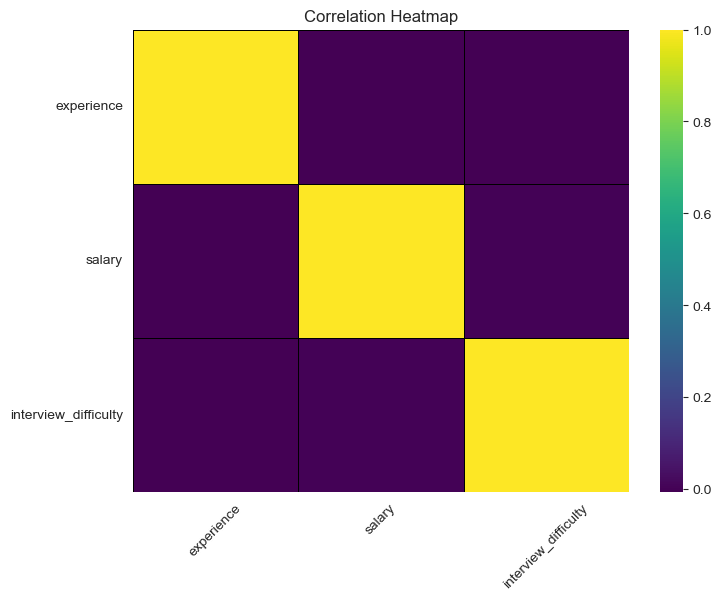

In [48]:
# Heat map of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(data[['experience', 'salary', 'interview_difficulty']].corr(),
            annot=False,
            cmap='viridis',  # Change the colormap to 'viridis'
            linewidths=0.5,
            linecolor='black',
            cbar=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()